# 前書き

本日は自然言語を対象とした機械学習を行うために、自然言語処理における

前処理や特徴量エンジニアリングについて説明する。

# 1. 自然言語処理の概要

本章では、自然言語処理のタスクや基礎技術についての概観を説明する。

## 1-1. 自然言語とは

自然言語とは、我々が日常的に使っている日本語や英語といった言語のことを指す。

プログラミング言語などは、人工言語と呼ぶ。

人工言語は予め文法やルールが明確に定まっており、かつ語彙も少ないが、

自然言語は表現が非常に多く、同じ単語でも文脈によって意味が異なったり、表現の揺れが生じたりするため、

曖昧な表現となることも多く扱いが難しい。

## 1-2. 自然言語処理の基盤技術

自然言語処理における基盤技術として、形態素解析や構文解析などがあげられる。

機械学習においては、形態素解析が特徴量抽出のための主要な基盤技術となっている。

形態素解析は、自然言語からなる文章を形態素と呼ばれる単位に分割する解析技術である。

形態素は、それ以上分割できない意味を形成する最小の文字列を指す。

例えば、「ラーメンを食べに行こう」という文を形態素解析すると、

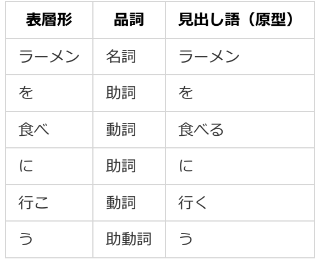

のように解析される。

構文解析は、かかり受けなど文節間の関係を解析する。

## 1-3. 自然言語処理のタスク

自然言語処理分野の主なタスクとして、下記があげられる。

- 文章分類(スパムメール判定など)
- 情報検索
- 機械翻訳
- 文章要約
- 文章生成
- 自動対話

など

# 2. 自然言語の前処理

本章では、元の文章から特徴量を抽出するために、事前におこなう処理について説明する。

主に形態素解析によって単語リストを生成し、その単語リストに含める単語などを調整する処理となる。

## 2-1. 形態素解析
先述した形態素解析を実際に行うプログラムについて説明する。

形態素解析を行うためのライブラリはいくつかあり、今回はJanomeを用いて形態素解析を行う。

Google Colabの場合、事前に下記コマンドでライブラリをインストールする。


In [ ]:
!pip install janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 46.1 MB/s eta 0:00:00


Janomeは依存ライブラリがなく、形態素を判別するための辞書が内包されており、手軽に扱うことができる。

他の形態素解析ライブラリの場合、形態素辞書のインストールや設定などが必要となる。


下記に、「ラーメンを食べに行こう」という文章をJanomeを用いて形態素解析する例を示す。

In [ ]:
from janome.tokenizer import Tokenizer

# トークナイザを初期化
t = Tokenizer()

# 対象の文章
text = 'ラーメンを食べに行こう'

# 形態素解析
tokens = t.tokenize(text)

# 形態素(トークン)を一つずつ表示
for token in tokens:
  print(token)

ラーメン	名詞,一般,*,*,*,*,ラーメン,ラーメン,ラーメン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
食べ	動詞,自立,*,*,一段,連用形,食べる,タベ,タベ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
行こ	動詞,自立,*,*,五段・カ行促音便,未然ウ接続,行く,イコ,イコ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ


結果のように、各形態素とその品詞情報などが得られる。

## 2-2. わかち書き

わかち書きとは、単語の区切りに空白を挿入する書き方のことである。

この後の処理についてわかち書きが必要となる。

Janomeにおいては、 Tokenizer の初期化時に wakati=True の引数を指定することでリストが取得できるため、

文字列のjoinメソッドを組み合わせて簡単にわかち書きができる。

下記にコードを示す。

In [ ]:
from janome.tokenizer import Tokenizer

# トークナイザをわかち書きモードで初期化
t = Tokenizer(wakati=True)

# 対象の文章
text = 'ラーメンを食べに行こう'

# 形態素解析
tokens = t.tokenize(text)

# リストに変換
words = list(tokens)
print(words)

# スペース区切りの文字列に変換
wakati = " ".join(words)
print(wakati)

['ラーメン', 'を', '食べ', 'に', '行こ', 'う']
ラーメン を 食べ に 行こ う


## 2-3. フィルタリング

実際の自然言語処理において、全ての形態素を使うことは少ない。

名詞や動詞などの文章において重要な意味を持つ形態素のみを使ったり、

「て」、「に」、「を」、「は」などの出現頻度が多く、ノイズとなりやすい助詞を省いたりなどの

フィルタリングを行うことが多い。

また、英語文字列の大文字小文字を統一するといったフィルタリングも行う場合がある。

Janomeには、特定品詞の抽出や、小文字化のためのフィルターなどが用意されている。

形態素解析ライブラリによっては、自力で実装をする必要もあれば、

あらかじめ専用の関数が用意されている場合もある。

下記にJanomeによる名詞と動詞のみを抽出し、小文字化処理と表層形のみの抽出(わかち書き)を行う

プログラムを示す。

In [ ]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import *
from janome.tokenfilter import *

# 対象の文章
text = 'JanomeはPythonで簡単に使える形態素解析ライブラリです。'

# 品詞フィルターと小文字化フィルターの設定
token_filters = [POSKeepFilter(['名詞', '動詞']), LowerCaseFilter()]

# アナライザーの初期化(フィルター利用時に使う)
a = Analyzer(tokenizer=Tokenizer(), token_filters=token_filters)

# フィルター付きで形態素解析
tokens = a.analyze(text)

# アナライザーはわかち書きのオプションが使えないため、表層形のみを抽出する場合は適宜実装する
words = []
for token in tokens:
  # 形態素の表示
  print(token)
  # 表層形を抽出
  words.append(str(token).split("\t")[0])

print("===========")
print(words)

janome	名詞,固有名詞,組織,*,*,*,janome,*,*
python	名詞,一般,*,*,*,*,python,*,*
簡単	名詞,形容動詞語幹,*,*,*,*,簡単,カンタン,カンタン
使える	動詞,自立,*,*,一段,基本形,使える,ツカエル,ツカエル
形態素	名詞,一般,*,*,*,*,形態素,ケイタイソ,ケイタイソ
解析	名詞,サ変接続,*,*,*,*,解析,カイセキ,カイセキ
ライブラリ	名詞,一般,*,*,*,*,ライブラリ,ライブラリ,ライブラリ
['janome', 'python', '簡単', '使える', '形態素', '解析', 'ライブラリ']


## 2-4. その他の前処理

### 正規化

同じ意味の単語でも、半角と全角、英語とカタカナといった違いが生じる場合、

別の単語として処理されてしまう。

そのため、表記の揺れを統一すると精度向上に寄与することが多い。

正規表現などを用いて愚直に単語の置換することも多いが、正規化のライブラリを組み合わせて

利用する方が簡単に処理が記述できる。

下記に例を示す。

In [ ]:
!pip install neologdn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neologdn: filename=neologdn-0.5.2-cp310-cp310-linux_x86_64.whl size=219149 sha256=b82c5bead96696f432fa49513198cc9abe325bf920aafe8be3d2d3f4d95ff806
  Stored in directory: /root/.cache/pip/wheels/bd/87/af/2a36d74f666a8428943b70d71c5e9dd740435bf671f210672c
Successfully built neologdn


In [ ]:
import neologdn
import re

text = "JanomeはPythonで簡単に使える形態素解析ライブラリです!!"
print(text)

# 正規化
text = neologdn.normalize(text)
print(text)

# 正規表現による半角記号の除去
text = re.sub("[!-/:-@[-`{-~]", " ", text)
print(text)

JanomeはPythonで簡単に使える形態素解析ライブラリです!!
JanomeはPythonで簡単に使える形態素解析ライブラリです!!
JanomeはPythonで簡単に使える形態素解析ライブラリです  


### 見出し語

動詞などの活用形がある品詞は、単語を統一するために原型(見出し語)を用いた方が良い場合もある。

下記にJanomeにおける見出し後の抽出の例を示す。

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
text = 'ラーメンを食べに行こう'
tokens = t.tokenize(text)

words = []
for token in tokens:
  print(token)
  # 見出し後の抽出
  words.append(str(token).split(",")[6])

print(words)

ラーメン	名詞,一般,*,*,*,*,ラーメン,ラーメン,ラーメン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
食べ	動詞,自立,*,*,一段,連用形,食べる,タベ,タベ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
行こ	動詞,自立,*,*,五段・カ行促音便,未然ウ接続,行く,イコ,イコ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
['ラーメン', 'を', '食べる', 'に', '行く', 'う']


### ストップワードの除去

「です」、「ます」や記号といった、意味をなさない不要な語をストップワードと呼び、

それらの語を除去した方がよい場合が多い。

品詞によるフィルタリングでも十分な場合もあるが、例えば名詞の中にも不要な名詞がある場合などは、

ストップワードのリストをつくり、それらの単語を事前に除去しておく。

地道にストップワードのリストを作るのは大変であるため、単語の出現頻度が高すぎる単語を

除去する考え方もある。

Pythonにおいては、組み込みクラスのCounterを使うと実装が簡潔になる。

In [ ]:
from collections import Counter

# 単語リスト
words = ["dog", "cat", "apple", "cat", "apple", "cat", "banana", "apple", "cat", "dog"]

# 単語のカウント
counter = Counter(words)
print(counter)

# 上位2つの頻出単語(タプルのリスト)を抽出
stop_words = counter.most_common(n=2)
print(stop_words)

# 頻出単語のみの集合に変換
stop_words = set(map(lambda x: x[0], stop_words))
print(stop_words)

# 頻出単語の除去
words = [w for w in words if w not in stop_words]
print(words)

Counter({'cat': 4, 'apple': 3, 'dog': 2, 'banana': 1})
[('cat', 4), ('apple', 3)]
{'apple', 'cat'}
['dog', 'banana', 'dog']


## 2-5. 練習問題

### 2-1.
下記のような文書のリストから、各文章をJanomeで形態素解析し、表層形のリストを取得し、

表示するプログラムを作成せよ。

In [ ]:
text_list = [
  "日本の首都は東京です。",
  "浜松市は、政令指定都市の中で最も面積が広い。",
  "本日の最高気温は25度で、昨日より3度低いです。"
]

出力例

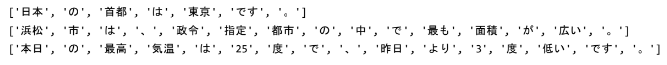

### 2-2.
2-1.の結果を、名詞、動詞、形容詞のみにせよ。

出力例

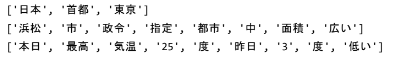

# 3. 自然言語の特徴量エンジニアリング

本章では、前処理によって生成された単語リストをもとに、機械学習アルゴリズムに渡すための

数値の特徴量を生成する手法について説明する。

## 3-1. Bag-of-Words(BoW)

Bag-of-Words(以下BoW)は、各文書に出現する全て単語を特徴量の列とし、

各単語の出現頻度を特徴量とする。

例えば、下記3つの単語リストがあるとする。

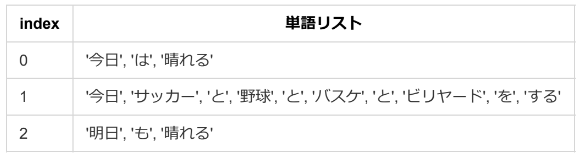

このとき、上記から生成されるBoWは次のようになる。

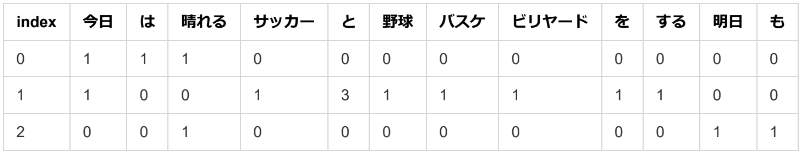

プログラムにおけるBoWの計算は、sklearnに用意されている CountVectorizer クラスで行うことができる。

下記に例を示す。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 形態素解析済みの文書リスト
words_list = [
  ['今日', 'は', '晴れる'],
  ['今日', 'サッカー', 'と', '野球', 'と', 'バスケ', 'と', 'ビリヤード', 'を', 'する'],
  ['明日', 'も', '晴れる']
]

# わかち書き(単語のスペース区切り)形式に変換
wakati_list = list(map(lambda x: " ".join(x), words_list))
print(wakati_list)

# BoWの計算。token_patternはデフォルトだと1文字の語が消えるため、消えないように設定
vec = CountVectorizer(token_pattern='\\b\\w+\\b')
vec.fit(wakati_list)
bow = vec.transform(wakati_list)
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化
df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
print(df)

['今日 は 晴れる', '今日 サッカー と 野球 と バスケ と ビリヤード を する', '明日 も 晴れる']
['する' 'と' 'は' 'も' 'を' 'サッカー' 'バスケ' 'ビリヤード' '今日' '明日' '晴れる' '野球']
[[0 0 1 0 0 0 0 0 1 0 1 0]
 [1 3 0 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 0]]
   する  と  は  も  を  サッカー  バスケ  ビリヤード  今日  明日  晴れる  野球
0   0  0  1  0  0     0    0      0   1   0    1   0
1   1  3  0  0  1     1    1      1   1   0    0   1
2   0  0  0  1  0     0    0      0   0   1    1   0


## 3-2. One-hotエンコーディング

One-hotエンコーディングは、BoWの頻度がない(0 or 1)表現である。

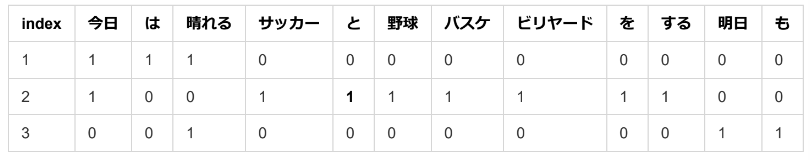

CountVectorizerに binary=True オプションを付与することで、One-hotエンコーディングになる。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 形態素解析済みの文書リスト
words_list = [
  ['今日', 'は', '晴れる'],
  ['今日', 'サッカー', 'と', '野球', 'と', 'バスケ', 'と', 'ビリヤード', 'を', 'する'],
  ['明日', 'も', '晴れる']
]

# わかち書き(単語のスペース区切り)形式に変換
wakati_list = list(map(lambda x: " ".join(x), words_list))
print(wakati_list)

# one-hotエンコーディングの計算。binary=Trueオプションで可能
vec = CountVectorizer(binary=True, token_pattern='\\b\\w+\\b')
vec.fit(wakati_list)
bow = vec.transform(wakati_list)
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化
df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
print(df)

['今日 は 晴れる', '今日 サッカー と 野球 と バスケ と ビリヤード を する', '明日 も 晴れる']
['する' 'と' 'は' 'も' 'を' 'サッカー' 'バスケ' 'ビリヤード' '今日' '明日' '晴れる' '野球']
[[0 0 1 0 0 0 0 0 1 0 1 0]
 [1 1 0 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 0]]
   する  と  は  も  を  サッカー  バスケ  ビリヤード  今日  明日  晴れる  野球
0   0  0  1  0  0     0    0      0   1   0    1   0
1   1  1  0  0  1     1    1      1   1   0    0   1
2   0  0  0  1  0     0    0      0   0   1    1   0


## 3-3. tf-idf

BoWはシンプルではあるが、単語の重要度が考慮されていないという問題がある。

tf-idfは、単語の重要度を考慮した計算式で特徴量を生成する。

tf-idfの計算の概念としては、
- ある文書の中で頻繁に出現する単語は、その文書において重要な単語である。
- 多くの文書の中に出現する単語は、一般的な単語であるため重要な単語ではない。

という考え方に基づく計算式となっている。

実際のプログラムにおいては、 TfidfVectorizer クラスを利用する。

使い方はCountVectorizerと同様である。下記に例を示す。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 形態素解析済みの文書リスト
words_list = [
  ['今日', 'は', '晴れる'],
  ['今日', 'サッカー', 'と', '野球', 'と', 'バスケ', 'と', 'ビリヤード', 'を', 'する'],
  ['明日', 'も', '晴れる']
]

# わかち書き(単語のスペース区切り)形式に変換
wakati_list = list(map(lambda x: " ".join(x), words_list))
print(wakati_list)

# tf-idfの計算
vec = TfidfVectorizer(token_pattern='\\b\\w+\\b')
vec.fit(wakati_list)
bow = vec.transform(wakati_list)
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化
df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
print(df)

['今日 は 晴れる', '今日 サッカー と 野球 と バスケ と ビリヤード を する', '明日 も 晴れる']
['する' 'と' 'は' 'も' 'を' 'サッカー' 'バスケ' 'ビリヤード' '今日' '明日' '晴れる' '野球']
[[0.         0.         0.68091856 0.         0.         0.
  0.         0.         0.51785612 0.         0.51785612 0.        ]
 [0.25336031 0.76008093 0.         0.         0.25336031 0.25336031
  0.25336031 0.25336031 0.19268705 0.         0.         0.25336031]
 [0.         0.         0.         0.62276601 0.         0.
  0.         0.         0.         0.62276601 0.4736296  0.        ]]
        する         と         は         も        を     サッカー      バスケ    ビリヤード  \
0  0.00000  0.000000  0.680919  0.000000  0.00000  0.00000  0.00000  0.00000   
1  0.25336  0.760081  0.000000  0.000000  0.25336  0.25336  0.25336  0.25336   
2  0.00000  0.000000  0.000000  0.622766  0.00000  0.00000  0.00000  0.00000   

         今日        明日       晴れる       野球  
0  0.517856  0.000000  0.517856  0.00000  
1  0.192687  0.000000  0.000000  0.25336  
2  0.000000  0.622766  0.4736

## 3-4. N-gram

N-gram自体は特徴量生成の手法ではないが、BoWやtf-idfと組み合わせて利用する。



ここまでの特徴量生成手法は、語順が考慮に入っていない。

1つの単語のみでBoWやtf-idfを適用するのではなく、連続した2つや3つの単語を1つの語とみなして

特徴量を生成することが有効になる場合がある。

N-gramのNは、連続するN個の単語を1語とみなすという意味がある。

なお、1-gram、2-gram、3-gramは、特別にuni-gram、bi-gram、tri-gramと呼ぶ。

例えば、下記二つの文書は構成する単語は同じため、BoWを生成すると同じ特徴量になるが、

人が読むと意味が異なる。

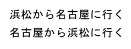

上記をbi-gram(2-gram)で表現すると、

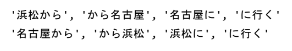

となり、uni-gramとは異なる特徴量が得られることになる。

実装においては、CountVectorizer, TfidfVectorizerクラスともに ngram_range=(a, b) という引数で

使用するN-gramを指定できる。

ngram_range=(2, 2) の場合はbi-gramのみを使用するということになり、

ngram_range=(1, 3) の場合はuni-gram, bi-gram, tri-gramを使用するということになる。

下記にプログラムの例を示す。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 形態素解析済みの文書リスト
words_list = [
  ['浜松', 'から', '名古屋', 'に', '行く'],
  ['名古屋', 'から', '浜松', 'に', '行く']
]

# わかち書き(単語のスペース区切り)形式に変換
wakati_list = list(map(lambda x: " ".join(x), words_list))
print(wakati_list)

# bi-gramでBoWの計算
vec = CountVectorizer(ngram_range=(2, 2), token_pattern='\\b\\w+\\b')
vec.fit(wakati_list)
bow = vec.transform(wakati_list)
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化
df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
print(df)

['浜松 から 名古屋 に 行く', '名古屋 から 浜松 に 行く']
['から 名古屋' 'から 浜松' 'に 行く' '名古屋 から' '名古屋 に' '浜松 から' '浜松 に']
[[1 0 1 0 1 1 0]
 [0 1 1 1 0 0 1]]
   から 名古屋  から 浜松  に 行く  名古屋 から  名古屋 に  浜松 から  浜松 に
0       1      0     1       0      1      1     0
1       0      1     1       1      0      0     1


### 文字N-gram

ここまでは前提として、形態素解析を用いて単語レベルで特徴量を生成した。

文字N-gramは、単語ではなく文字レベルでN-gramを生成し、それを一つの語とみなす手法である。

文字単位で見るため、形態素解析によるわかち書きが不要となる。

実装においては、CountVectorizer, TfidfVectorizerクラスともに analyzer='char' を

指定することで文字N-gramを使用する。

この際、文書リストはわかち書き不要である。

下記にプログラムの例を示す。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 文書リスト
text_list = [
  '浜松から名古屋に行く',
  '名古屋から浜松に行く'
]

# 文字tri-gramでBoWの計算。トークンを使わないため、token_patternは不要。
vec = CountVectorizer(analyzer='char', ngram_range=(3, 3))
vec.fit(text_list)
bow = vec.transform(text_list)
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化
df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
print(df)

['から名' 'から浜' 'に行く' 'ら名古' 'ら浜松' '古屋か' '古屋に' '名古屋' '屋から' '屋に行' '松から' '松に行'
 '浜松か' '浜松に']
[[1 0 1 1 0 0 1 1 0 1 1 0 1 0]
 [0 1 1 0 1 1 0 1 1 0 0 1 0 1]]
   から名  から浜  に行く  ら名古  ら浜松  古屋か  古屋に  名古屋  屋から  屋に行  松から  松に行  浜松か  浜松に
0    1    0    1    1    0    0    1    1    0    1    1    0    1    0
1    0    1    1    0    1    1    0    1    1    0    0    1    0    1


## 3-5. 特徴量変換

BoWは、ほとんどの特徴量が0か1になることが多く、大きい値となる特徴量は少ない。

学習器によっては、そのような分布の偏りがあると精度が落ちることもあるため、

分布の偏りがないほうが好ましい場合がある。

変換の一例として、sklearn.preprocessingのQuantileTransformerを使い、

0~1の範囲で一様分布に変換するなどがある。

自然言語処理における特徴量は、語の数だけ生成されるため、

その数は数千～数万となることが多い。

そのため、次元削減を行い、次元数を圧縮したいことも多い。

主成分分析（PCA)も使えるが、自然言語処理では特異値分解で次元削減することが多い。

下記にプログラムの例を示す。

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# 形態素解析済みの文書リスト
words_list = [
  ['今日', 'は', '晴れる'],
  ['今日', 'サッカー', 'と', '野球', 'と', 'バスケ', 'と', 'ビリヤード', 'を', 'する'],
  ['明日', 'も', '晴れる']
]

# わかち書き(単語のスペース区切り)形式に変換
wakati_list = list(map(lambda x: " ".join(x), words_list))

# BoWの計算
vec = CountVectorizer(token_pattern='\\b\\w+\\b')
vec.fit(wakati_list)
bow = vec.transform(wakati_list)

# 特異値分解。n_componentsで次元数を指定。
svd = TruncatedSVD(n_components=3, random_state=0)
svd.fit(bow)
bow_svd = svd.transform(bow)

# 元の特徴量
print(vec.get_feature_names_out())
print(bow.toarray())

# データフレーム化(特異値分解後の値)
df = pd.DataFrame(bow_svd)
print(df)

['する' 'と' 'は' 'も' 'を' 'サッカー' 'バスケ' 'ビリヤード' '今日' '明日' '晴れる' '野球']
[[0 0 1 0 0 0 0 0 1 0 1 0]
 [1 3 0 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 1 1 0]]
          0         1         2
0  0.307507  1.375238  1.007055
1  3.997725 -0.114216 -0.071747
2  0.023515  1.433531 -0.971821


## 3-6. 練習問題

### 3-1.

下記の文書リストをbi-gramでone-hotエンコーディングせよ。

In [ ]:
text_list = [
  "日本の首都は東京です。",
  "浜松市は、政令指定都市の中で最も面積が広い。",
  "本日の最高気温は25度で、昨日より3度低いです。"
]

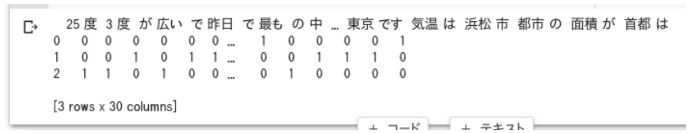

### 3-2.

3-1. を特異値分解して2次元にせよ。

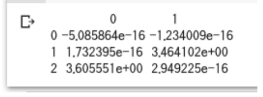

# 4. 演習および課題

## 4-1. 演習

### 演習1.

news_min_jp.csv は文書であるtext列とその文書の分類ラベルであるgroup列(3クラス分類)を持つ。

下記に従い、textからgroupを予測する学習モデルを作成せよ。

- Janomeを使って形態素解析を行う
- 名詞、動詞、形容詞のみを抽出する
- 抽出する単語は表層形を用いる 表層
- 英字は小文字で統一する
- 特徴量生成にはtf-idfを用いる
- 学習アルゴリズムはk-最近傍法(k=10)を用いる
- 検証はホールドアウト法とし、train_test_splitはrandom_state=0のみを指定する

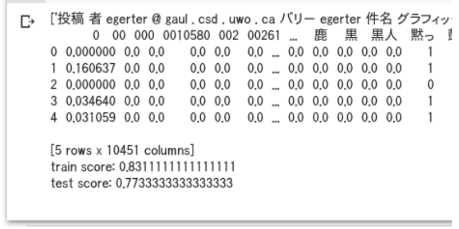

news_min_jp.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/news_min_jp.csv)からダウンロードできる。

## 4-2. 課題

### 課題1.
演習のタスクにおいてより精度の高い予測プログラムを作成せよ。
